In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

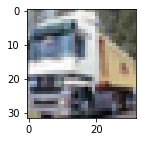

In [6]:
plt.figure(figsize=(15,2))
plt.imshow(x_train[1])

In [7]:
classes=['aeroplane','automobiles','bird','cat','deer','dog','frog','horse','ship','truck']
classes[1]

'automobiles'

In [8]:
y_train.shape

(50000, 1)

In [9]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
y_train=y_train.reshape(-1,)
y_train.shape

(50000,)

In [11]:
y_train[0:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [12]:
def fun(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

In [14]:
y_train[100]

8

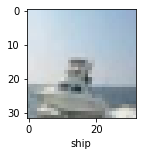

In [13]:
fun(x_train,y_train,100)

In [14]:
y_train[1]

9

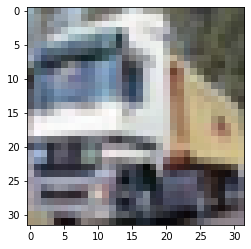

In [15]:
plt.imshow(x_train[1])

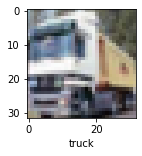

In [16]:
fun(x_train,y_train,1)

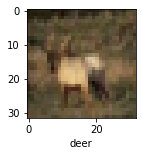

In [17]:
fun(x_train,y_train,3)

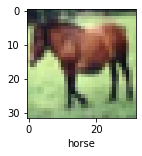

In [18]:
fun(x_train,y_train,7)

In [19]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [20]:
x_train=x_train/255
x_test=x_test/255

In [21]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [22]:
ANN=models.Sequential([
          layers.Flatten(input_shape=(32,32,3)),
          layers.Dense(3000,activation='relu'),
          layers.Dense(10,activation='sigmoid')
      ])

In [23]:
ANN.compile(
          optimizer='adam',
          loss='sparse_categorical_crossentropy',#if y values present in 1,2,3,4... like use sparse categorical crossentropy
           # if y values are present in one hot encoded fromate like 0,0,0,0,0,0,1 use categorical crossentropy
          metrics=['accuracy']
          )

In [24]:
ANN.fit(x_train,y_train,epochs=5)

Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 92s 2ms/sample - loss: 2.3065 - accuracy: 0.1003
Epoch 2/5
50000/50000 [==============================] - 87s 2ms/sample - loss: 2.3026 - accuracy: 0.1000s - loss: 2.3026 - 
Epoch 3/5
50000/50000 [==============================] - 90s 2ms/sample - loss: 2.3026 - accuracy: 0.1000
Epoch 4/5
50000/50000 [==============================] - 92s 2ms/sample - loss: 2.3026 - accuracy: 0.1000s - - ETA: 5s - loss: 2.3026 - accuracy: 0.10 - ETA: 5s - loss: 2.3026 - accuracy: 0.10 - ETA: 4s
Epoch 5/5
50000/50000 [==============================] - 94s 2ms/sample - loss: 2.3026 - accuracy: 0.1000


In [25]:
ANN.evaluate(x_test,y_test)

10000/10000 [==============================] - 7s 746us/sample - loss: 2.3026 - accuracy: 0.1000 - los


[2.302585266876221, 0.1]

In [26]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred=ANN.predict(x_test)


In [27]:
y_pred[0:10]

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], dtype=float32)

In [28]:
y_pred_classes=[np.argmax(element) for element in y_pred]

In [29]:
print('classification_report:\n',classification_report(y_test,y_pred_classes))

classification_report:
               precision    recall  f1-score   support

           0       0.10      1.00      0.18      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



C:\Users\sahithya\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
CNN=models.Sequential([
    
          layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
          layers.MaxPooling2D((2,2)),
    
          layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
          layers.MaxPooling2D((2,2)),
    
    
          
          layers.Flatten(),
          layers.Dense(64,activation='relu'),
          layers.Dense(10,activation='softmax')
      ])

In [35]:
CNN.compile(
          optimizer='adam',
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])

In [36]:
CNN.fit(x_train,y_train,epochs=5)

Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 35s 699us/sample - loss: 1.4944 - accuracy: 0.4587
Epoch 2/5
50000/50000 [==============================] - 39s 786us/sample - loss: 1.1317 - accuracy: 0.6021
Epoch 3/5
50000/50000 [==============================] - 42s 832us/sample - loss: 1.0048 - accuracy: 0.6493
Epoch 4/5
50000/50000 [==============================] - 43s 867us/sample - loss: 0.9210 - accuracy: 0.6807
Epoch 5/5
50000/50000 [==============================] - ETA: 0s - loss: 0.8611 - accuracy: 0.70 - 43s 865us/sample - loss: 0.8611 - accuracy: 0.7031


In [37]:
CNN.fit(x_train,y_train,epochs=10)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 39s 771us/sample - loss: 0.8088 - accuracy: 0.7201
Epoch 2/10
50000/50000 [==============================] - 43s 861us/sample - loss: 0.7651 - accuracy: 0.7374
Epoch 3/10
50000/50000 [==============================] - 44s 874us/sample - loss: 0.7265 - accuracy: 0.7487
Epoch 4/10
50000/50000 [==============================] - 47s 933us/sample - loss: 0.6896 - accuracy: 0.7617
Epoch 5/10
50000/50000 [==============================] - 48s 962us/sample - loss: 0.6577 - accuracy: 0.7724
Epoch 6/10
50000/50000 [==============================] - 48s 958us/sample - loss: 0.6235 - accuracy: 0.7855
Epoch 7/10
50000/50000 [==============================] - 50s 1ms/sample - loss: 0.5976 - accuracy: 0.7927s -
Epoch 8/10
50000/50000 [==============================] - 48s 954us/sample - loss: 0.5694 - accuracy: 0.8029
Epoch 9/10
50000/50000 [==============================] - 53s 1ms/sample - loss: 0.5422 - accuracy: 0.81

In [38]:
CNN.evaluate(x_test,y_test)

10000/10000 [==============================] - 5s 489us/sample - loss: 1.0143 - accuracy: 0.6959


[1.0142960208892822, 0.6959]

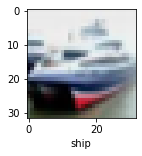

In [40]:
y_test=y_test.reshape(-1)
fun(x_test,y_test,1)

In [42]:
y_pred=CNN.predict(x_test)
y_pred[0:5]

array([[1.44088053e-05, 1.88066182e-03, 4.54115169e-03, 9.34465230e-01,
        1.88925420e-04, 2.43398012e-03, 1.05361373e-03, 1.02674665e-06,
        5.54142892e-02, 6.82929976e-06],
       [2.87973997e-03, 6.25432143e-03, 8.65105232e-09, 1.97969974e-10,
        9.64432978e-11, 3.87794614e-12, 2.26447472e-10, 1.16339655e-11,
        9.90859449e-01, 6.46785929e-06],
       [6.19723916e-01, 1.16787188e-01, 2.16677319e-03, 2.21556285e-03,
        3.12026677e-04, 1.40261236e-05, 1.31376946e-04, 4.49741550e-04,
        2.51624823e-01, 6.57456461e-03],
       [9.95557964e-01, 1.20568639e-05, 3.08379269e-04, 5.94066933e-06,
        2.09854232e-04, 1.70809855e-08, 3.17263073e-07, 5.92837672e-08,
        3.90542625e-03, 2.58427058e-08],
       [4.52744757e-08, 4.17305127e-05, 1.37158232e-02, 4.78981325e-04,
        2.87571281e-01, 6.99527038e-04, 6.97224975e-01, 2.70464752e-05,
        2.40511479e-04, 5.24283301e-08]], dtype=float32)

In [43]:
np.argmax([5,13,3,3])

1

at the index1 13 is there it is the highest one among all elements

In [44]:
np.argmax([y_pred[0]])

3

In [45]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[0:5]

[3, 8, 0, 0, 6]

In [47]:
y_test[0:5]

array([3, 8, 8, 0, 6], dtype=uint8)

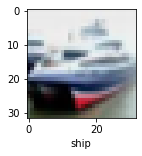

In [48]:
fun(x_test,y_test,1)

In [50]:
classes[y_classes[1]]

'ship'

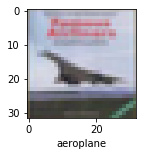

In [51]:
fun(x_test,y_test,3)

In [53]:
classes[y_classes[3]]

'aeroplane'

In [55]:
print('classification_report:\n',classification_report(y_test,y_classes))

classification_report:
               precision    recall  f1-score   support

           0       0.74      0.76      0.75      1000
           1       0.82      0.80      0.81      1000
           2       0.53      0.66      0.59      1000
           3       0.54      0.45      0.49      1000
           4       0.65      0.68      0.66      1000
           5       0.62      0.56      0.59      1000
           6       0.75      0.77      0.76      1000
           7       0.79      0.71      0.75      1000
           8       0.77      0.81      0.79      1000
           9       0.77      0.76      0.76      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

